# IBM Watson Visual Recognition (For local and external images)
So far I have prepared this j-notebook to analyze an image online and a local image.<br>
Also, since I couldn't get an API key yet, the json with the results is read locally.

## In IBM Watson we can send request in batches of maximum 15 images and 100 MB (from their API documentation):
An image file (gif, .jpg, .png, .tif.) or .zip file with images. Limit the .zip file to 100 MB. You can include a maximum of 15 images in a request.

## Unfortunately, without a paying plan we cannot use this service for more than 250 request per day without upgrading.
To get started, you will create a Lite Plan (no charge) instance of the Visual Recognition service, which is capped at 250 Events per day. Your Lite plan instance will be deleted after 30 days of inactivity if you do not upgrade your account to a subscription plan.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import patches

# To install their sdk use:
# pip install --upgrade watson-developer-cloud
# As indicated in: https://github.com/watson-developer-cloud/python-sdk#installation
from watson_developer_cloud import VisualRecognitionV3

In [ ]:
#You will get an error when running, if not having the API key
visual_recognition = VisualRecognitionV3('2016-05-20', api_key='YOUR API KEY')

## With a local image

In [2]:
image = Image.open('3faces.jpg')

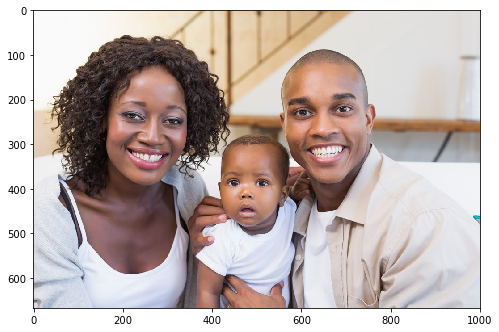

In [3]:
plt.figure(figsize=(8,8))
ax = plt.imshow(image)

In [ ]:
#To use with local images when having a valid API key
with open(image, 'rb') as image_file:
    face_result = visual_recognition.detect_faces(images_file=image_file)

In [4]:
#This cell no needed when having an API key as is loading the result from a local json file
import json
with open('3faces.json') as fd:
    faces_result = json.load(fd)

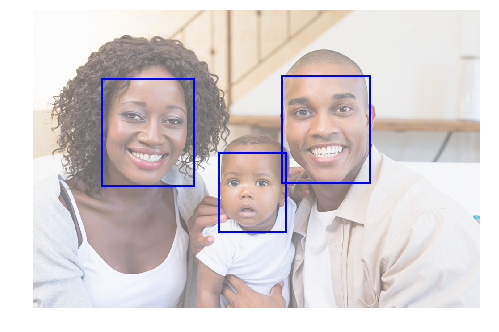

In [5]:
plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)

for face in faces_result['images'][0]['faces']:
    fr = face['face_location']
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
_ = plt.axis("off")

## With an image from an external site

In [6]:
image_url = 'https://www.ibm.com/ibm/ginni/images/ginni_bio_780x981_v4_03162016.jpg'

In [7]:
import requests
from io import BytesIO

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

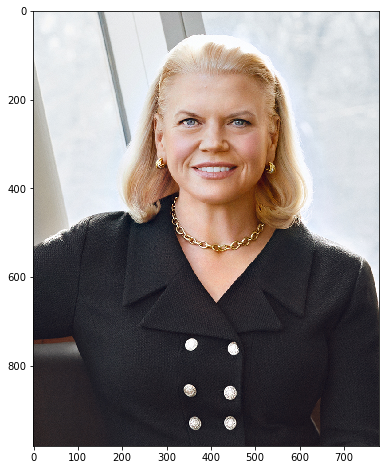

In [8]:
plt.figure(figsize=(8,8))
ax = plt.imshow(image)

In [ ]:
#To use with urls when having a valid API key
faces_result = visual_recognition.detect_faces(parameters=json.dumps({'url': image_url}))

In [9]:
#This cell no needed when having an API key as is loading the result from a local json file
import json
with open('1face.json') as fd:
    faces_result = json.load(fd)

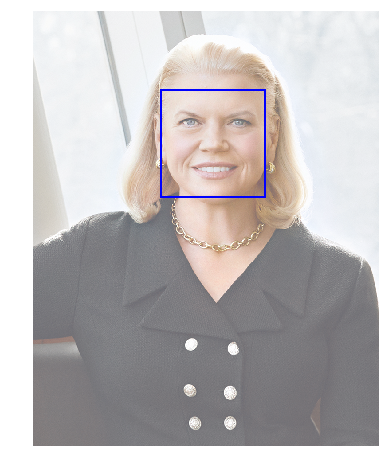

In [10]:
plt.figure(figsize=(8,8))
ax = plt.imshow(image, alpha=0.6)

for face in faces_result['images'][0]['faces']:
    fr = face['face_location']
    origin = (fr["left"], fr["top"])
    p = patches.Rectangle(origin, fr["width"], fr["height"], fill=False, linewidth=2, color='b')
    ax.axes.add_patch(p)
_ = plt.axis("off")